# 4 families based on bunch positions


In [22]:
from pathlib import Path
from LHC_FillingPattern import LHCFillingPattern 
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd
import pandas as pd
from pprint import pprint
import math

In [23]:
fill_number = 10709
DATADIR = Path('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2025/')
RAWDATA = DATADIR / 'rawdata'
fpat = LHCFillingPattern(fill_number, RAWDATA)

In [24]:
fpat.collbid_ip15
fpat.collbid_ip8
fpat.collbid_ip2
orbit_length = 3564
fpat.bunchtrainsDF_b1 = fpat.bunchtrainsDF_b1[fpat.bunchtrainsDF_b1['id'] != 0]
fpat.bunchtrainsDF_b1 #Beam 1
fpat.bunchtrainsDF_b2 = fpat.bunchtrainsDF_b2[fpat.bunchtrainsDF_b2['id'] != 0]
fpat.bunchtrainsDF_b2 #Beam 2

#Filling pattern Beam 1 vs Beam 2
print("BEAM 1")
print(fpat.bunchtrainsDF_b1['nbunches'].unique())
print(fpat.bunchtrainsDF_b1['gap'].unique())

print("BEAM 2")
print(fpat.bunchtrainsDF_b2['nbunches'].unique())
print(fpat.bunchtrainsDF_b2['gap'].unique())

BEAM 1
[36]
[32  8 63]
BEAM 2
[36]
[44  8 32 63]


## Family 1, maximum lr interactions

### Beam 1

In [25]:
beam = 'B1'    
ip   = 'ip1'  
lr_b1 = fpat.lrencounters[beam][ip]   
slots_b1_1= np.arange(3564)
is_filled_lr_b1 = np.zeros(3564, dtype=bool)
filled_b1 = fpat.bunches_b1
is_filled_lr_b1[filled_b1] = lr_b1[filled_b1] > 0


Bunch IDs with LR between 31 and 35: [  68   69   70   71   72   73   74   75   76   77  111  112  113  114
  115  116  117  118  119  120  154  155  156  157  158  159  160  161
  162  163  221  222  223  224  225  226  227  228  229  230  264  265
  266  267  268  269  270  271  272  273  307  308  309  310  311  312
  313  314  315  316  350  351  352  353  354  355  356  357  358  359
  417  418  419  420  421  422  423  424  425  426  460  461  462  463
  464  465  466  467  468  469  503  504  505  506  507  508  509  510
  511  512  546  547  548  549  550  551  552  553  554  555  613  614
  615  616  617  618  619  620  621  622  656  657  658  659  660  661
  662  663  664  665  699  700  701  702  703  704  705  706  707  708
  742  743  744  745  746  747  748  749  750  751  809  810  811  812
  813  814  815  816  817  818  852  853  854  855  856  857  858  859
  860  861  895  896  897  898  899  900  901  902  903  904  962  963
  964  965  966  967  968  969  970  971

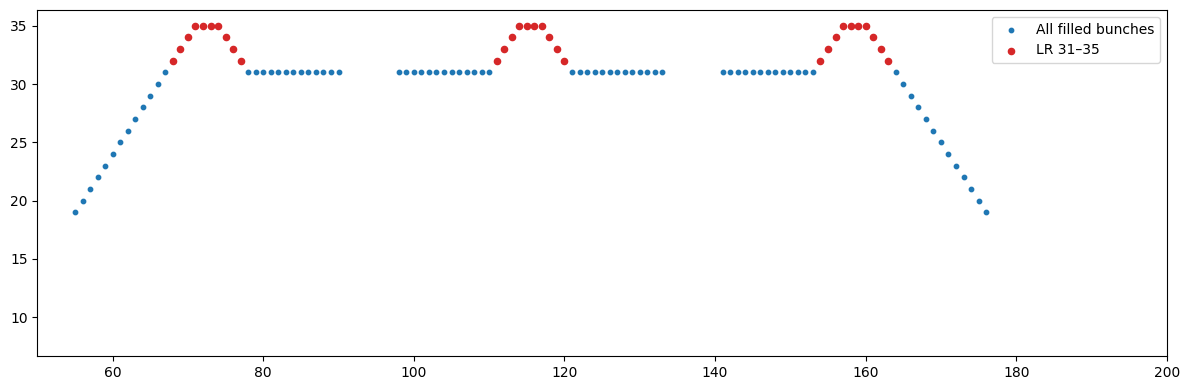

In [ ]:
plt.figure(figsize=(12, 4))
# 1) plot all filled bunches with LR > 0
plt.scatter( slots_b1_1[is_filled_lr_b1], lr_b1[is_filled_lr_b1], color='tab:blue', s=10, label='All filled bunches')
# 2) build a mask for LR in [31, 35]
mask_lr_range_b1 = (lr_b1 > 31) & (lr_b1 <= 35)
# 3) restrict to the actually filled slots
mask_filled_lr_range_b1 = is_filled_lr_b1 & mask_lr_range_b1
# 4) extract those slot IDs
Family_1_b1 = slots_b1_1[mask_filled_lr_range_b1]
print("Bunch IDs with LR between 31 and 35:", Family_1_b1)
print("Count:", len(Family_1_b1))

# 5) over-plot them in a distinct color
plt.scatter( slots_b1_1[mask_filled_lr_range_b1], lr_b1[mask_filled_lr_range_b1], color='tab:red', s=20, label='LR 31–35'
)
plt.xlim(50,200)
plt.legend()
plt.tight_layout()
plt.show()

### Beam 2


In [27]:
beam = 'B2'   
ip   = 'ip1'  
lr_b2 = fpat.lrencounters[beam][ip]   
slots_b2_1= np.arange(3564)
is_filled_lr_b2 = np.zeros(3564, dtype=bool)
filled_b2 = fpat.bunches_b2
is_filled_lr_b2[filled_b2] = lr_b2[filled_b2] > 0

Bunch IDs with LR between 31 and 35: [  68   69   70   71   72   73   74   75   76   77  111  112  113  114
  115  116  117  118  119  120  154  155  156  157  158  159  160  161
  162  163  221  222  223  224  225  226  227  228  229  230  264  265
  266  267  268  269  270  271  272  273  307  308  309  310  311  312
  313  314  315  316  350  351  352  353  354  355  356  357  358  359
  417  418  419  420  421  422  423  424  425  426  460  461  462  463
  464  465  466  467  468  469  503  504  505  506  507  508  509  510
  511  512  546  547  548  549  550  551  552  553  554  555  613  614
  615  616  617  618  619  620  621  622  656  657  658  659  660  661
  662  663  664  665  699  700  701  702  703  704  705  706  707  708
  742  743  744  745  746  747  748  749  750  751  809  810  811  812
  813  814  815  816  817  818  852  853  854  855  856  857  858  859
  860  861  895  896  897  898  899  900  901  902  903  904  962  963
  964  965  966  967  968  969  970  971

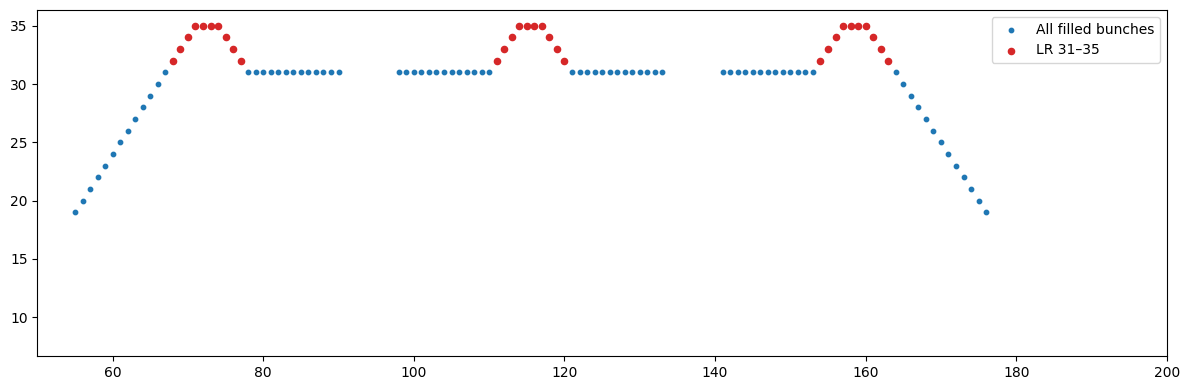

In [28]:
plt.figure(figsize=(12, 4))
# 1) plot all filled bunches with LR > 0
plt.scatter( slots_b2_1[is_filled_lr_b2], lr_b2[is_filled_lr_b2], color='tab:blue', s=10, label='All filled bunches')
# 2) build a mask for LR in [31, 35]
mask_lr_range_b2 = (lr_b2 > 31) & (lr_b2 <= 35)
# 3) restrict to the actually filled slots
mask_filled_lr_range_b2= is_filled_lr_b2 & mask_lr_range_b2
# 4) extract those slot IDs
Family_1_b2 = slots_b2_1[mask_filled_lr_range_b2]
print("Bunch IDs with LR between 31 and 35:", Family_1_b2)
print("Count:", len(Family_1_b2))

# 5) over-plot them in a distinct color
plt.scatter( slots_b2_1[mask_filled_lr_range_b2], lr_b2[mask_filled_lr_range_b2], color='tab:red', s=20, label='LR 31–35'
)
plt.xlim(50,200)
plt.legend()
plt.tight_layout()
plt.show()

## Family 2 LR =31

### Beam 1

Family 2 (LR = 31) bunch IDs: [  67   78   79 ... 3410 3411 3422]
1312


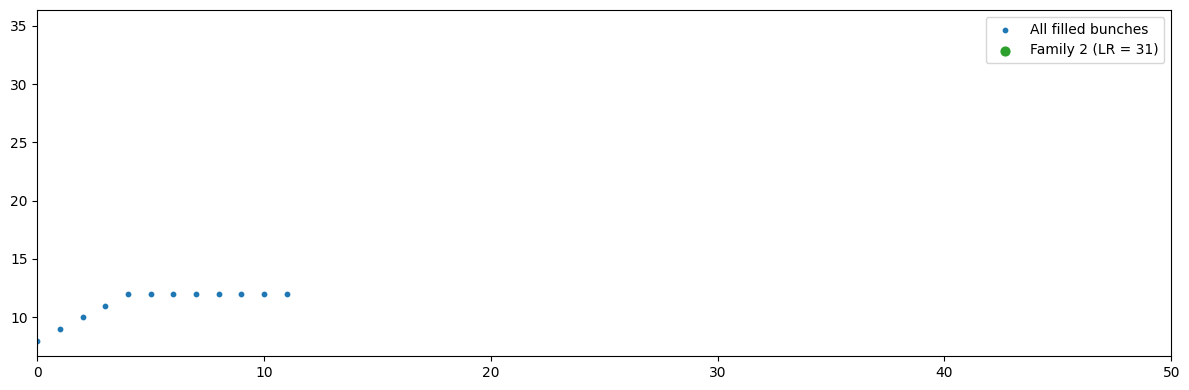

In [29]:
plt.figure(figsize=(12, 4))
# 1) all filled bunches
slots_b1_2= np.arange(3564)
plt.scatter( slots_b1_2[is_filled_lr_b2], lr_b2[is_filled_lr_b2], color='tab:blue', s=10, label='All filled bunches')
# 3) Family 2: LR == 31
mask_lr31_b1        = (lr_b1 == 31)
mask_filled_lr31_b1 = is_filled_lr_b1 & mask_lr31_b1
Family_2_b1 = slots_b1_2[mask_filled_lr31_b1]

# over-plot the LR=31 points
plt.scatter(
    Family_2_b1,
    lr_b1[mask_filled_lr31_b1],
    color='tab:green',
    s=40,
    label='Family 2 (LR = 31)'
)
# optional: print the IDs
print("Family 2 (LR = 31) bunch IDs:", Family_2_b1)
print(len(Family_2_b1))
plt.xlim(0,50)
plt.legend()
plt.tight_layout()
plt.show()


### Beam 2

Family 2 (LR = 31) bunch IDs: [  67   78   79 ... 3410 3411 3422]
1312


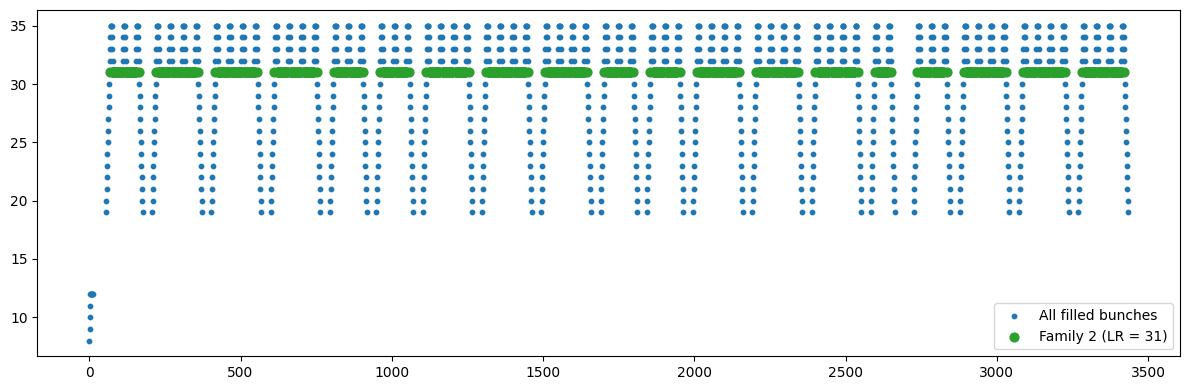

In [30]:
plt.figure(figsize=(12, 4))
# 1) all filled bunches
slots_b2_2= np.arange(3564)
plt.scatter( slots_b2_2[is_filled_lr_b2], lr_b2[is_filled_lr_b2], color='tab:blue', s=10, label='All filled bunches')
# 3) Family 2: LR == 31
mask_lr31_b2        = (lr_b2== 31)
mask_filled_lr31_b2 = is_filled_lr_b2 & mask_lr31_b2
Family_2_b2 = slots_b2_2[mask_filled_lr31_b2]

# over-plot the LR=31 points
plt.scatter(
    Family_2_b2,
    lr_b1[mask_filled_lr31_b2],
    color='tab:green',
    s=40,
    label='Family 2 (LR = 31)'
)
# optional: print the IDs
print("Family 2 (LR = 31) bunch IDs:", Family_2_b2)
print(len(Family_2_b2))
plt.legend()
plt.tight_layout()
plt.show()

## Family 3 LR <31, HEAD

### Beam 1


First-leg bunch IDs with 19≤LR≤31 in each train:
[  55   56   57   58   59   60   61   62   63   64   65   66  208  209
  210  211  212  213  214  215  216  217  218  219  404  405  406  407
  408  409  410  411  412  413  414  415  600  601  602  603  604  605
  606  607  608  609  610  611  796  797  798  799  800  801  802  803
  804  805  806  807  949  950  951  952  953  954  955  956  957  958
  959  960 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113
 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307 1308 1309 1494 1495
 1496 1497 1498 1499 1500 1501 1502 1503 1504 1505 1690 1691 1692 1693
 1694 1695 1696 1697 1698 1699 1700 1701 1843 1844 1845 1846 1847 1848
 1849 1850 1851 1852 1853 1854 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2192 2193 2194 2195 2196 2197 2198 2199 2200 2201
 2202 2203 2388 2389 2390 2391 2392 2393 2394 2395 2396 2397 2398 2399
 2584 2585 2586 2587 2588 2589 2590 2591 2592 2593 2594 2595 2725 2726
 2727 2728 2729 2730 2731 27

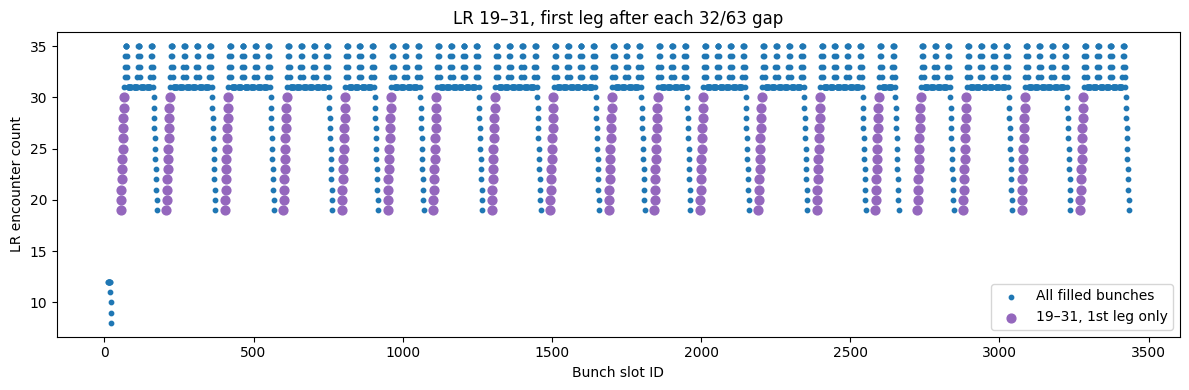

In [31]:
plt.figure(figsize=(12, 4))
# 1) All filled slots and their LR
all_slots     = np.arange(3564)
filled_slots  = all_slots[is_filled_lr_b1]
filled_lr     = lr_b1[is_filled_lr_b1]
plt.scatter(
    filled_slots,
    filled_lr,
    color='tab:blue',
    s=10,
    label='All filled bunches'
)
# 2) Find where the big gaps are
diffs       = np.diff(filled_slots)
gap_locs    = np.where(np.isin(diffs, [32, 63]))[0]
# Train i runs from filled_slots[ train_starts[i] : train_ends[i] ]
train_starts = np.concatenate(([0], gap_locs + 1))
train_ends   = np.concatenate((gap_locs + 1, [len(filled_slots)]))
first_leg_slots = []
first_leg_lr    = []
# 3) For each train, grab the first contiguous run with 19 ≤ LR ≤ 31
for start, end in zip(train_starts, train_ends):
    seg_slots = filled_slots[start:end]
    seg_lr    = filled_lr[start:end]
    # mask within this train
    m = (seg_lr >= 19) & (seg_lr < 31)
    idxs = np.nonzero(m)[0]
    if idxs.size == 0:
        continue
    # split into contiguous runs
    runs = np.split(idxs, np.where(np.diff(idxs) > 1)[0] + 1)
    head_run = runs[0]        # only the *first* run
    # record the global slot IDs + LR for that run
    first_leg_slots.extend(seg_slots[head_run])
    first_leg_lr   .extend(seg_lr[head_run])
Family_3_b1 = np.array(first_leg_slots)
first_leg_lr    = np.array(first_leg_lr)
# 4) print & plot
print("First-leg bunch IDs with 19≤LR≤31 in each train:")
print(Family_3_b1)
print("Count:", len(Family_3_b1))

plt.scatter(
    Family_3_b1,
    first_leg_lr,
    color='tab:purple',
    s=40,
    label='19–31, 1st leg only'
)
plt.xlabel("Bunch slot ID")
plt.ylabel("LR encounter count")
plt.title("LR 19–31, first leg after each 32/63 gap")
plt.legend()
plt.tight_layout()
plt.show()


### Beam 2

Beam 2, first-leg bunch IDs with 19≤LR≤31 after each 32/63 gap:
[  55   56   57   58   59   60   61   62   63   64   65   66  208  209
  210  211  212  213  214  215  216  217  218  219  404  405  406  407
  408  409  410  411  412  413  414  415  600  601  602  603  604  605
  606  607  608  609  610  611  796  797  798  799  800  801  802  803
  804  805  806  807  949  950  951  952  953  954  955  956  957  958
  959  960 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113
 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307 1308 1309 1494 1495
 1496 1497 1498 1499 1500 1501 1502 1503 1504 1505 1690 1691 1692 1693
 1694 1695 1696 1697 1698 1699 1700 1701 1843 1844 1845 1846 1847 1848
 1849 1850 1851 1852 1853 1854 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2192 2193 2194 2195 2196 2197 2198 2199 2200 2201
 2202 2203 2388 2389 2390 2391 2392 2393 2394 2395 2396 2397 2398 2399
 2584 2585 2586 2587 2588 2589 2590 2591 2592 2593 2594 2595 2725 2726
 2727 2728 27

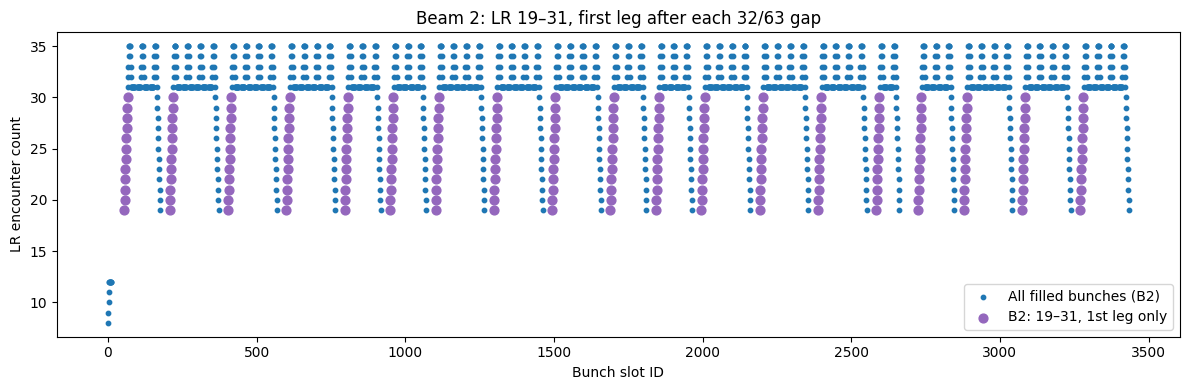

In [32]:
beam2 = 'B2'
ip    = 'ip1'
lr_b2 = fpat.lrencounters[beam2][ip]

slots_b2        = np.arange(3564)
is_filled_lr_b2 = np.zeros(3564, dtype=bool)
filled_b2       = fpat.bunches_b2
is_filled_lr_b2[filled_b2] = lr_b2[filled_b2] > 0

# ─── Plot ────────────────────────────────────────────────────────
plt.figure(figsize=(12, 4))

# 1) all filled slots + their LR
filled_slots2 = slots_b2[is_filled_lr_b2]
filled_lr2    = lr_b2[is_filled_lr_b2]
plt.scatter(
    filled_slots2,
    filled_lr2,
    color='tab:blue',
    s=10,
    label='All filled bunches (B2)'
)

# 2) find the 32/63-slot gaps
diffs2     = np.diff(filled_slots2)
gap_locs2  = np.where(np.isin(diffs2, [32, 63]))[0]
train_starts2 = np.concatenate(([0], gap_locs2 + 1))
train_ends2   = np.concatenate((gap_locs2 + 1, [len(filled_slots2)]))

# 3) collect only the **first** contiguous run in each train with 19 ≤ LR ≤ 31
first_leg_slots2 = []
first_leg_lr2    = []

for start, end in zip(train_starts2, train_ends2):
    seg_slots = filled_slots2[start:end]
    seg_lr    = filled_lr2[start:end]

    # mask within this train
    m    = (seg_lr >= 19) & (seg_lr < 31)
    idxs = np.nonzero(m)[0]
    if idxs.size == 0:
        continue

    # split into contiguous runs, take the first
    runs    = np.split(idxs, np.where(np.diff(idxs) > 1)[0] + 1)
    head_run = runs[0]

    first_leg_slots2.extend(seg_slots[head_run])
    first_leg_lr2   .extend(seg_lr[head_run])

Family_3_b2= np.array(first_leg_slots2)
first_leg_lr2    = np.array(first_leg_lr2)

# 4) print & over-plot
print("Beam 2, first-leg bunch IDs with 19≤LR≤31 after each 32/63 gap:")
print(Family_3_b2)
print("Count:", len(Family_3_b2))

plt.scatter(
    Family_3_b2,
    first_leg_lr2,
    color='tab:purple',
    s=40,
    label='B2: 19–31, 1st leg only'
)

plt.xlabel("Bunch slot ID")
plt.ylabel("LR encounter count")
plt.title("Beam 2: LR 19–31, first leg after each 32/63 gap")
plt.legend()
plt.tight_layout()
plt.show()

## Family 4, TAIL

Tail-leg bunch IDs with 19≤LR<31 in each train:
[ 165  166  167  168  169  170  171  172  173  174  175  176  361  362
  363  364  365  366  367  368  369  370  371  372  557  558  559  560
  561  562  563  564  565  566  567  568  753  754  755  756  757  758
  759  760  761  762  763  764  906  907  908  909  910  911  912  913
  914  915  916  917 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068
 1069 1070 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266
 1451 1452 1453 1454 1455 1456 1457 1458 1459 1460 1461 1462 1647 1648
 1649 1650 1651 1652 1653 1654 1655 1656 1657 1658 1800 1801 1802 1803
 1804 1805 1806 1807 1808 1809 1810 1811 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 2149 2150 2151 2152 2153 2154 2155 2156
 2157 2158 2159 2160 2345 2346 2347 2348 2349 2350 2351 2352 2353 2354
 2355 2356 2541 2542 2543 2544 2545 2546 2547 2548 2549 2550 2551 2552
 2651 2652 2653 2654 2655 2656 2657 2658 2659 2660 2661 2662 2835 2836
 2837 2838 2839 2840 2841 284

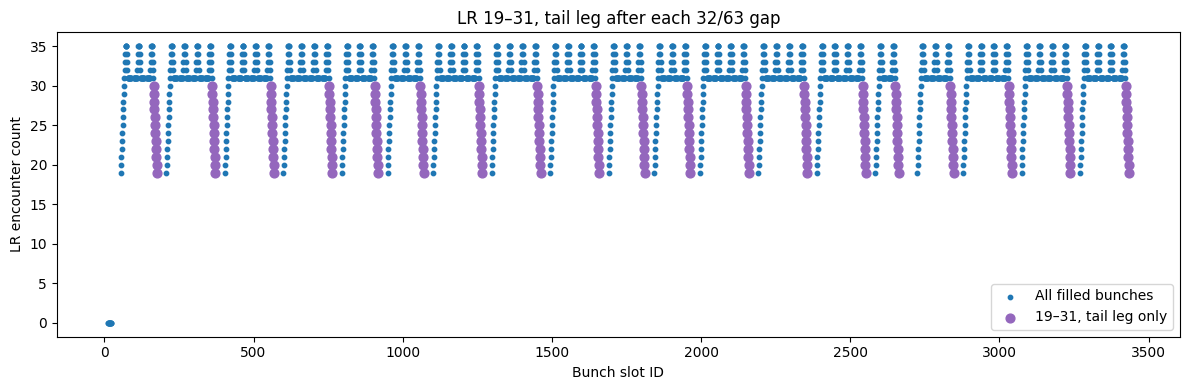

In [33]:
plt.figure(figsize=(12, 4))
# 1) All filled slots and their LR
all_slots     = np.arange(3564)
filled_slots  = all_slots[is_filled_lr_b1]
filled_lr     = lr_b2[is_filled_lr_b1]

plt.scatter(
    filled_slots,
    filled_lr,
    color='tab:blue',
    s=10,
    label='All filled bunches'
)

# 2) Find the big gaps (32 or 63)
diffs       = np.diff(filled_slots)
gap_locs    = np.where(np.isin(diffs, [32, 63]))[0]

# build train boundaries
train_starts = np.concatenate(([0],        gap_locs + 1))
train_ends   = np.concatenate((gap_locs + 1, [len(filled_slots)]))

tail_slots = []
tail_lr    = []

# 3) For each train, grab the *last* contiguous run with 19 ≤ LR < 31
for start, end in zip(train_starts, train_ends):
    seg_slots = filled_slots[start:end]
    seg_lr    = filled_lr[start:end]

    # mask within this train
    m     = (seg_lr >= 19) & (seg_lr < 31)
    idxs  = np.nonzero(m)[0]
    if idxs.size == 0:
        continue

    # split into contiguous runs
    runs     = np.split(idxs, np.where(np.diff(idxs) > 1)[0] + 1)
    tail_run = runs[-1]        # <— pick the *last* run

    # collect slot IDs + LR
    tail_slots.extend(seg_slots[tail_run])
    tail_lr   .extend(seg_lr[tail_run])

Family_4_b1 =  np.array(tail_slots)
tail_lr    = np.array(tail_lr)

# 4) print & plot
print("Tail-leg bunch IDs with 19≤LR<31 in each train:")
print(Family_4_b1)
print("Count:", len(Family_4_b1))

plt.scatter(
    Family_4_b1,
    tail_lr,
    color='tab:purple',
    s=40,
    label='19–31, tail leg only'
)

plt.xlabel("Bunch slot ID")
plt.ylabel("LR encounter count")
plt.title("LR 19–31, tail leg after each 32/63 gap")
plt.legend()
plt.tight_layout()
plt.show()


### Beam 2

Beam 2 tail-leg bunch IDs with 19≤LR<31 in each train:
[ 165  166  167  168  169  170  171  172  173  174  175  176  361  362
  363  364  365  366  367  368  369  370  371  372  557  558  559  560
  561  562  563  564  565  566  567  568  753  754  755  756  757  758
  759  760  761  762  763  764  906  907  908  909  910  911  912  913
  914  915  916  917 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068
 1069 1070 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266
 1451 1452 1453 1454 1455 1456 1457 1458 1459 1460 1461 1462 1647 1648
 1649 1650 1651 1652 1653 1654 1655 1656 1657 1658 1800 1801 1802 1803
 1804 1805 1806 1807 1808 1809 1810 1811 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 2149 2150 2151 2152 2153 2154 2155 2156
 2157 2158 2159 2160 2345 2346 2347 2348 2349 2350 2351 2352 2353 2354
 2355 2356 2541 2542 2543 2544 2545 2546 2547 2548 2549 2550 2551 2552
 2651 2652 2653 2654 2655 2656 2657 2658 2659 2660 2661 2662 2835 2836
 2837 2838 2839 2840 2

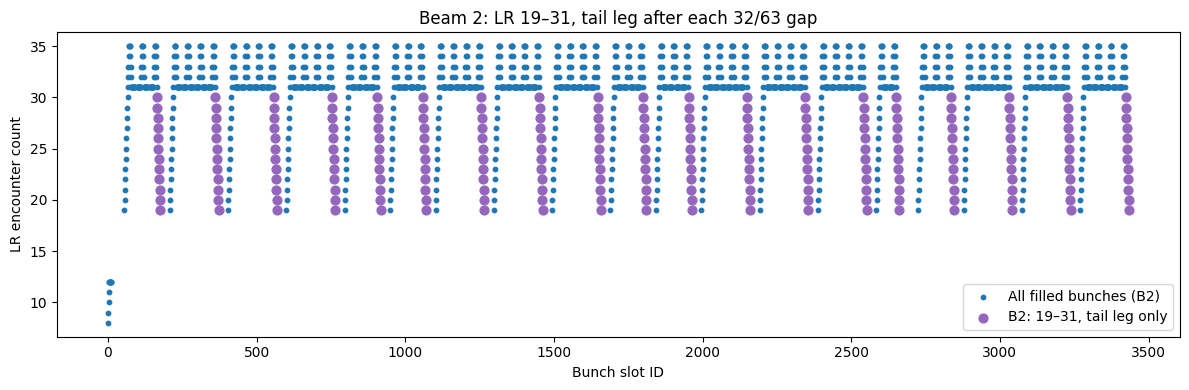

In [34]:
# ─── Setup for beam 2, IP1 ──────────────────────────────────────────
beam2 = 'B2'
ip    = 'ip1'
lr_b2 = fpat.lrencounters[beam2][ip]

slots_b2        = np.arange(3564)
is_filled_lr_b2 = np.zeros(3564, dtype=bool)
filled_b2       = fpat.bunches_b2
is_filled_lr_b2[filled_b2] = lr_b2[filled_b2] > 0

# ─── Plot ────────────────────────────────────────────────────────
plt.figure(figsize=(12, 4))

# 1) All filled slots and their LR
filled_slots2 = slots_b2[is_filled_lr_b2]
filled_lr2    = lr_b2[is_filled_lr_b2]

plt.scatter(
    filled_slots2,
    filled_lr2,
    color='tab:blue',
    s=10,
    label='All filled bunches (B2)'
)

# 2) Find the big gaps (32 or 63)
diffs2      = np.diff(filled_slots2)
gap_locs2   = np.where(np.isin(diffs2, [32, 63]))[0]

# build train boundaries
train_starts2 = np.concatenate(([0],        gap_locs2 + 1))
train_ends2   = np.concatenate((gap_locs2 + 1, [len(filled_slots2)]))

tail_slots2 = []
tail_lr2    = []

# 3) For each train, grab the *last* contiguous run with 19 ≤ LR < 31
for start, end in zip(train_starts2, train_ends2):
    seg_slots = filled_slots2[start:end]
    seg_lr    = filled_lr2[start:end]

    # mask within this train
    m     = (seg_lr >= 19) & (seg_lr < 31)
    idxs  = np.nonzero(m)[0]
    if idxs.size == 0:
        continue

    # split into contiguous runs
    runs     = np.split(idxs, np.where(np.diff(idxs) > 1)[0] + 1)
    tail_run = runs[-1]        # pick the *last* run

    # collect slot IDs + LR
    tail_slots2.extend(seg_slots[tail_run])
    tail_lr2   .extend(seg_lr[tail_run])

Family_4_b2= np.array(tail_slots2)
tail_lr2    = np.array(tail_lr2)

# 4) print & plot
print("Beam 2 tail-leg bunch IDs with 19≤LR<31 in each train:")
print(Family_4_b2)
print("Count:", len(Family_4_b2))

plt.scatter(
    Family_4_b2,
    tail_lr2,
    color='tab:purple',
    s=40,
    label='B2: 19–31, tail leg only'
)

plt.xlabel("Bunch slot ID")
plt.ylabel("LR encounter count")
plt.title("Beam 2: LR 19–31, tail leg after each 32/63 gap")
plt.legend()
plt.tight_layout()
plt.show()


## ATLAS LUMINOSITY

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from pathlib import Path
from PIL import Image
import sys

# ── Ensure pyarrow is available for reading parquet ──────────────────────────
try:
    import pyarrow
except ImportError:
    print("Missing dependency: pyarrow\nPlease install it using:\n  pip install pyarrow")
    sys.exit(1)

# ── Configuration ────────────────────────────────────────────────────────────
fno            = 10709
atlas_lumi_var = "ATLAS:BUNCH_LUMI_INST"
DATADIR        = Path("/eos/project/l/lhc-lumimod/LuminosityFollowUp/2025/")
RAWPATH        = DATADIR / "rawdata"
FILLINFO       = DATADIR / "fills-info"

# ── Your four families (lists of bunch-indices, 0-based) ─────────────────────
families = {
    'F1 → LR Max'   : Family_1_b2,
    'F2 → LR 31'    : Family_2_b2,
    'F3 → Beginning': Family_3_b2,
    'F4 → End'      : Family_4_b2,
}


# ── 1) Load STABLE window ────────────────────────────────────────────────────
fbmodes = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")
if 'timestamp' in fbmodes.columns:
    fbmodes = fbmodes.set_index('timestamp').sort_index()

rowST = (fbmodes.loc[fno]
         .query("BMODE=='STABLE'")
         .sort_values("tsStart"))
if rowST.empty:
    rowST = fbmodes.loc[fno].sort_values("tsEnd").iloc[[-1]]

t0 = pd.to_datetime(rowST["tsStart"].iloc[0], utc=True)
t1 = pd.to_datetime(rowST["tsEnd"].iloc[0], utc=True)

# ── 2) Read & slice per-bunch ATLAS lumi ────────────────────────────────────
raw = pd.read_parquet(RAWPATH / f"HX:FILLN={fno}", columns=[atlas_lumi_var])
ser = raw[atlas_lumi_var]
ser.index = pd.to_datetime(ser.index, utc=True, errors="coerce")
ser = ser[(ser.index >= t0) & (ser.index <= t1)].dropna()

# expand list-typed series into DataFrame
if ser.dtype == object and isinstance(ser.iloc[0], (list, np.ndarray)):
    atlas_df = pd.DataFrame(ser.tolist(), index=ser.index)
else:
    atlas_df = ser.to_frame()

time_index = atlas_df.index
M_atlas     = atlas_df.values.astype(float)

# ── 3) Apply luminosity threshold for "valid" data before averaging ────────
#    discard anything <1 (zero-close noise)
M_clean = M_atlas.copy()
M_clean[M_clean < 1.0] = np.nan

# explicitly build the union of all family slots
fam_ids_union = sorted(set().union(*families.values()))

# overall average curve over exactly those slots
overall_curve = np.nanmean(M_clean[:, fam_ids_union], axis=1)

# per-family average curves
family_curves = {
    fam_name: np.nanmean(M_clean[:, slots], axis=1)
    for fam_name, slots in families.items()
}


/tmp/ipykernel_879081/541508644.py:71: RuntimeWarning: Mean of empty slice
  overall_curve = np.nanmean(M_clean[:, fam_ids_union], axis=1)
/tmp/ipykernel_879081/541508644.py:75: RuntimeWarning: Mean of empty slice
  fam_name: np.nanmean(M_clean[:, slots], axis=1)


Saved: /home/kpervain/work/FILL10709/ATLAS_fam_b2/ATLAS_fam18.png
Saved: /home/kpervain/work/FILL10709/ATLAS_fam_b2/ATLAS_fam18.gif


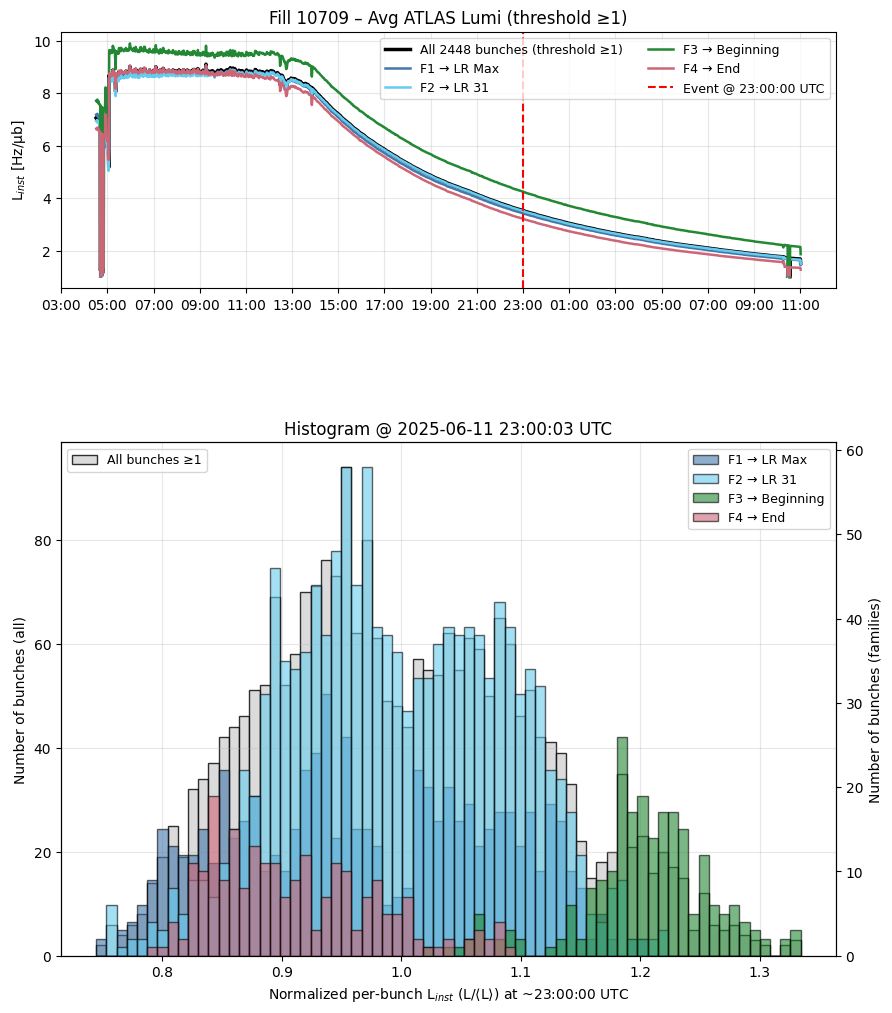

In [73]:
analysis_time_str = "23:00:00"
# ── 4) Pick the sample closest to analysis_time_str & build histograms ─────
first_day = ser.index[0].date()
target_dt = pd.Timestamp(f"{first_day} {analysis_time_str}", tz="UTC")
idx_near  = (ser.index.to_series().sub(target_dt).abs()).idxmin()
ser6_arr  = ser.loc[idx_near].astype(float)

bunch_ids     = np.arange(len(ser6_arr))
all_lumi      = ser6_arr[bunch_ids]
all_lumi      = all_lumi[all_lumi >= 1.0]

# per-family arrays at that time
fam_lumis = {}
for name, ids in families.items():
    sel = np.intersect1d(ids, bunch_ids)
    arr = ser6_arr[sel]
    fam_lumis[name] = arr[arr >= 1.0]

# ── 4a) Normalize histogram inputs by mean of all-bunches ───────────────────
mean_all       = np.nanmean(all_lumi)
all_lumi_norm  = all_lumi / mean_all
fam_lumis_norm = {name: arr/mean_all for name, arr in fam_lumis.items()}

# ── 5) Define a consistent colour map ────────────────────────────────────────
base_colors = ['#4477AA', '#66CCEE', '#228833', '#CC6677']
color_map   = dict(zip(families.keys(), base_colors))

# ── 6) Create combined figure ────────────────────────────────────────────────
fig = plt.figure(figsize=(10, 12))
gs  = gridspec.GridSpec(2, 1, height_ratios=[1, 2], hspace=0.4)

# Top panel: time-series
ax1 = fig.add_subplot(gs[0])
ax1.plot(time_index, overall_curve, lw=2.5, color='black',
         label=f"All {len(fam_ids_union)} bunches (threshold ≥1)")
for name, curve in family_curves.items():
    ax1.plot(time_index, curve, lw=1.8,
             color=color_map[name], label=name)
ax1.axvline(target_dt, color='red', linestyle='--', lw=1.5,
            label=f"Event @ {analysis_time_str} UTC")

ax1.set_title(f"Fill {fno} – Avg ATLAS Lumi (threshold ≥1)")
ax1.set_ylabel("L$_{inst}$ [Hz/µb]")
ax1.legend(fontsize=9, ncol=2)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.grid(alpha=0.3)

# Bottom panel: normalized histogram
ax2 = fig.add_subplot(gs[1])
bins = np.linspace(all_lumi_norm.min(), all_lumi_norm.max(), 70)

# background histogram
ax2.hist(all_lumi_norm, bins=bins,
         color='lightgray', alpha=0.8,
         label='All bunches ≥1',
         edgecolor='black')
ax2.set_xlabel(f"Normalized per-bunch L$_{{inst}}$ (L/⟨L⟩) at ~{analysis_time_str} UTC")
ax2.set_ylabel("Number of bunches (all)")
ax2.legend(loc='upper left', fontsize=9)
ax2.grid(alpha=0.3)

# overlay family histograms on twin axis
ax3 = ax2.twinx()
for name in families:
    ax3.hist(fam_lumis_norm[name], bins=bins,
             color=color_map[name], alpha=0.6,
             label=name, edgecolor='black')
ax3.set_ylabel("Number of bunches (families)")
ax3.legend(loc='upper right', fontsize=9)

ax2.set_title(f"Histogram @ {idx_near.strftime('%Y-%m-%d %H:%M:%S %Z')}")

# ── 7) Save out PNG & GIF ────────────────────────────────────────────────────
outdir = Path.home() / "work" / f"FILL{fno:05d}" / "ATLAS_fam_b2"
outdir.mkdir(parents=True, exist_ok=True)

png_path = outdir / "ATLAS_fam18.png"
gif_path = outdir / "ATLAS_fam18.gif"

fig.savefig(png_path, format='png')
Image.open(png_path).save(gif_path, format='GIF')

print("Saved:", png_path)
print("Saved:", gif_path)


In [59]:
# ── after you compute ser6_arr, bunch_ids and all_lumi ─────────────────────

# which bunch‐IDs are “filled” at that time?
filled_ids = bunch_ids[ser6_arr[bunch_ids] >= 1.0]
print("Number of filled bunches:", len(filled_ids))

# how many unique bunch‐IDs do your four families cover?
fam_ids_union = set().union(*families.values())
print("Number of unique family IDs:", len(fam_ids_union))

# and are they the same?
print("Do they match?", len(filled_ids) == len(fam_ids_union))
print("Mean @ slice (raw):      ", np.nanmean(all_lumi))
print("Mean (normalized):       ", np.nanmean(all_lumi_norm))

Number of filled bunches: 2448
Number of unique family IDs: 2448
Do they match? True
Mean @ slice (raw):       8.916083870175617
Mean (normalized):        1.0


In [60]:
import numpy as np

# ── 1) Re-build your collision-by-IP sets ────────────────────────────────────
coll_beam = {
    'B1': {
        'IP15': set(fpat.collbid_ip15['B1']),
        'IP8' : set(fpat.collbid_ip8 ['B1']),
        'IP2' : set(fpat.collbid_ip2 ['B1']),
    },
    'B2': {
        'IP15': set(fpat.collbid_ip15['B2']),
        'IP8' : set(fpat.collbid_ip8 ['B2']),
        'IP2' : set(fpat.collbid_ip2 ['B2']),
    },
}

# ── 2) Pack your families into sets ─────────────────────────────────────────
families = {
    'B1': {
        'Family_1_b1': set(Family_1_b1),
        'Family_2_b1': set(Family_2_b1),
        'Family_3_b1': set(Family_3_b1),
        'Family_4_b1': set(Family_4_b1),
    },
    'B2': {
        'Family_1_b2': set(Family_1_b2),
        'Family_2_b2': set(Family_2_b2),
        'Family_3_b2': set(Family_3_b2),
        'Family_4_b2': set(Family_4_b2),
    }
}

# ── 3) Choose beam to check ─────────────────────────────────────────────────
beam = 'B1'  # or 'B2'

# ── 4) Get all filled-bunch BCIDs for that beam ─────────────────────────────
filled_bids = coll_beam[beam]['IP15'] | coll_beam[beam]['IP8'] | coll_beam[beam]['IP2']

# ── 5) Get union of all family BCIDs for that beam ──────────────────────────
family_union = set().union(*families[beam].values())

# ── 6) Compute extras: those in filled_bids but not in any family ──────────
extra = sorted(filled_bids - family_union)

# ── 7) Print just the extra BCIDs ───────────────────────────────────────────
print("BCIDs in filled trains but not assigned to any family:")
for bcid in extra:
    print(bcid)


BCIDs in filled trains but not assigned to any family:
12
13
14
15
16
17
18
19
20
21
22
23


In [69]:
import numpy as np
import pandas as pd
from pathlib import Path

# ── Configuration ────────────────────────────────────────────────────────────
fno           = 10709
bunch_var     = "ATLAS:BUNCH_LUMI_INST"
total_var     = "ATLAS:LUMI_TOT_INST"
analysis_time = "06:00:00"
DATADIR       = Path("/eos/project/l/lhc-lumimod/LuminosityFollowUp/2025/")
RAWPATH       = DATADIR / "rawdata"
FILLINFO      = DATADIR / "fills-info"

# ── 1) Determine fill date from the STABLE segment ─────────────────────────
fb = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")
stable = (fb.loc[fno]
            .query("BMODE=='STABLE'")
            .sort_values("tsStart"))
if stable.empty:
    raise RuntimeError(f"No STABLE window for fill {fno}")
fill_date = pd.to_datetime(stable.tsStart.iloc[0], utc=True).date()

# ── 2) Build the target Timestamp ───────────────────────────────────────────
target = pd.Timestamp(f"{fill_date} {analysis_time}", tz="UTC")

# ── 3) Load both per-bunch and total-lumi series ────────────────────────────
df = pd.read_parquet(
    RAWPATH / f"HX:FILLN={fno}",
    columns=[bunch_var, total_var]
)
ser_bunch = df[bunch_var].dropna().copy()
ser_total = df[total_var].dropna().copy()

# expand per-bunch lists → DataFrame if needed
if ser_bunch.dtype == object:
    ser_bunch = ser_bunch.apply(lambda x: np.asarray(x, float))
# ensure datetime index
ser_bunch.index = pd.to_datetime(ser_bunch.index, utc=True)
ser_total.index = pd.to_datetime(ser_total.index, utc=True)

# ── 4) Sort both series by time ─────────────────────────────────────────────
ser_bunch = ser_bunch.sort_index()
ser_total = ser_total.sort_index()

# ── 5) Pick the nearest sample to `target` in each ─────────────────────────
# get positional index of nearest timestamp
pos_b = ser_bunch.index.get_indexer([target], method="nearest")[0]
pos_t = ser_total.index.get_indexer([target], method="nearest")[0]

ts_b = ser_bunch.index[pos_b]
ts_t = ser_total.index[pos_t]

# extract values
bunch_array = ser_bunch.iloc[pos_b]
total_val   = ser_total.iloc[pos_t]

# flatten per-bunch array
bvals = np.asarray(bunch_array, float)

# ── 6) Threshold & compute means ────────────────────────────────────────────
valid = bvals[bvals >= 1.0]
if valid.size == 0:
    raise RuntimeError(f"No bunch-lumi ≥1 Hz/µb at {ts_b}")

mean_direct      = valid.mean()
mean_from_total  = total_val / valid.size
rel_difference   = 100 * (mean_direct - mean_from_total) / mean_direct

# ── 7) Report ───────────────────────────────────────────────────────────────
print(f"Sample time (per-bunch):       {ts_b}")
print(f"⟨per-bunch⟩ (direct)            : {mean_direct:.3e} Hz/µb")
print(f"Sample time (total INST)       : {ts_t}")
print(f"Total INST                     : {total_val:.3e} Hz/µb")
print(f"⟨per-bunch⟩ from total INST     : {mean_from_total:.3e} Hz/µb")
print(f"Relative difference            : {rel_difference:.2f}%")


Sample time (per-bunch):       2025-06-11 05:59:38.931013+00:00
⟨per-bunch⟩ (direct)            : 8.916e+00 Hz/µb
Sample time (total INST)       : 2025-06-11 06:00:02.571735+00:00
Total INST                     : 2.160e+04 Hz/µb
⟨per-bunch⟩ from total INST     : 8.824e+00 Hz/µb
Relative difference            : 1.03%


In [74]:
import re
import numpy as np
from PIL import Image
import imageio
from pathlib import Path

def make_video_movie(fill_number: int,
                     pattern: str = "ATLAS_fam*.gif",
                     output_name: str = "ATLAS_fam_movie_b2.mp4",
                     fps: float = 2.0,
                     reverse: bool = False):
    """
    Converts a series of GIF frames into a single MP4 video.

    Args:
        fill_number: Fill number (used in folder naming).
        pattern:     Glob pattern for GIF files.
        output_name: Name of the final MP4 video.
        fps:         Frames per second for playback.
        reverse:     If True, reverse frame order.
    """
    gif_dir = Path.home() / "work" / f"FILL{fill_number:05d}" / "ATLAS_fam_b2"
    output_path = gif_dir.parent / output_name

    def extract_number(fname):
        match = re.search(r'(\d+)', fname.stem)
        return int(match.group(1)) if match else -1

    gif_files = sorted(gif_dir.glob(pattern), key=extract_number)

    if not gif_files:
        raise FileNotFoundError(f"No GIF files found in {gif_dir} matching {pattern}")

    if reverse:
        gif_files = gif_files[::-1]

    writer = imageio.get_writer(
        str(output_path), fps=fps, codec='libx264', format='mp4', quality=8
    )

    for gif_file in gif_files:
        img = Image.open(gif_file).convert("RGB")
        writer.append_data(np.array(img))

    writer.close()
    print(f"✅ Video saved to: {output_path}")


In [75]:
make_video_movie(
    fill_number=10709,
    fps=1.0,
    reverse=False
)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 1200) to (1008, 1200) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


[rawvideo @ 0x73f5000] Stream #0: not enough frames to estimate rate; consider increasing probesize


✅ Video saved to: /home/kpervain/work/FILL10709/ATLAS_fam_movie_b2.mp4


## Colliding

In [76]:
import itertools

# 1) Build per-beam collision sets directly from the lists
coll_beam = {}
for beam in ('B1','B2'):
    coll_beam[beam] = {
        'IP15': set(fpat.collbid_ip15[beam]),
        'IP8' : set(fpat.collbid_ip8 [beam]),
        'IP2' : set(fpat.collbid_ip2 [beam]),
    }

# 2) Pack your families into sets
families = {
    'B1': {
        'Family_1_b1': set(Family_1_b1),
        'Family_2_b1': set(Family_2_b1),
        'Family_3_b1': set(Family_3_b1),
        'Family_4_b1': set(Family_4_b1),
    },
    'B2': {
        'Family_1_b2': set(Family_1_b2),
        'Family_2_b2': set(Family_2_b2),
        'Family_3_b2': set(Family_3_b2),
        'Family_4_b2': set(Family_4_b2),
    }
}

# 3) Helper to get bunch-IDs that collide at *exactly* a given combo of IPs
def only_at(combo, fam_set, ip_sets):
    s = fam_set.intersection(*(ip_sets[ip] for ip in combo))
    for other in set(ip_sets) - set(combo):
        s -= ip_sets[other]
    return sorted(s)

# 4) Loop and print
for beam in ('B1','B2'):
    print(f"\n=== Beam {beam} ===")
    ip_sets = coll_beam[beam]
    for fam_name, fam_set in families[beam].items():
        print(f"\n→ {fam_name}:")
        found = False
        for r in (1,2,3):
            for combo in itertools.combinations(ip_sets, r):
                bids = only_at(combo, fam_set, ip_sets)
                if bids:
                    found = True
                    label = " & ".join(combo)
                    # cast to int for clean printing
                    clean_ids = [int(b) for b in bids]
                    print(f"   • {label:<15} : {clean_ids}")
        if not found:
            print("   — no collisions in any IP combination —")


=== Beam B1 ===

→ Family_1_b1:
   • IP15 & IP8      : [1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649]
   • IP15 & IP2      : [809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861]
   • IP15 & IP8 & IP2 : [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 656, 657, 658, 659, 660,

In [77]:
import itertools

# 1) build the per-beam collision sets
coll_beam = {}
for beam in ('B1','B2'):
    coll_beam[beam] = {
        'IP15': set(fpat.collbid_ip15[beam]),
        'IP8' : set(fpat.collbid_ip8 [beam]),
        'IP2' : set(fpat.collbid_ip2 [beam]),
    }

# 2) list your families by beam
families = {
    'B1': ['Family_1_b1','Family_2_b1','Family_3_b1','Family_4_b1'],
    'B2': ['Family_1_b2','Family_2_b2','Family_3_b2','Family_4_b2'],
}

# 3) helper to get IDs colliding at exactly the given combo of IPs
def only_at(combo, fam_set, ip_sets):
    s = fam_set.intersection(*(ip_sets[ip] for ip in combo))
    for other in set(ip_sets) - set(combo):
        s -= ip_sets[other]
    return s

# 4) enumerate all combos
combos = [
    ('IP15',), ('IP8',), ('IP2',),
    ('IP15','IP8'), ('IP15','IP2'), ('IP8','IP2'),
    ('IP15','IP8','IP2'),
]

# 5) compute and print counts
for beam in ('B1','B2'):
    print(f"\n=== Beam {beam} ===")
    ip_sets = coll_beam[beam]
    for fam in families[beam]:
        fam_set = set(globals()[fam])
        print(f"\n→ {fam}:")
        for combo in combos:
            cnt = len(only_at(combo, fam_set, ip_sets))
            label = " & ".join(combo)
            print(f"   {label:15s} : {cnt}")



=== Beam B1 ===

→ Family_1_b1:
   IP15            : 0
   IP8             : 0
   IP2             : 0
   IP15 & IP8      : 30
   IP15 & IP2      : 20
   IP8 & IP2       : 0
   IP15 & IP8 & IP2 : 630

→ Family_2_b1:
   IP15            : 6
   IP8             : 0
   IP2             : 0
   IP15 & IP8      : 221
   IP15 & IP2      : 123
   IP8 & IP2       : 0
   IP15 & IP8 & IP2 : 962

→ Family_3_b1:
   IP15            : 15
   IP8             : 0
   IP2             : 0
   IP15 & IP8      : 39
   IP15 & IP2      : 45
   IP8 & IP2       : 0
   IP15 & IP8 & IP2 : 129

→ Family_4_b1:
   IP15            : 0
   IP8             : 0
   IP2             : 0
   IP15 & IP8      : 60
   IP15 & IP2      : 12
   IP8 & IP2       : 0
   IP15 & IP8 & IP2 : 156

=== Beam B2 ===

→ Family_1_b2:
   IP15            : 0
   IP8             : 0
   IP2             : 0
   IP15 & IP8      : 28
   IP15 & IP2      : 30
   IP8 & IP2       : 0
   IP15 & IP8 & IP2 : 622

→ Family_2_b2:
   IP15            : 3
   IP8        

In [78]:
import pandas as pd

# 1) Build per-beam collision sets
coll_beam = {
    beam: {
        'IP15': set(fpat.collbid_ip15[beam]),
        'IP8' : set(fpat.collbid_ip8 [beam]),
        'IP2' : set(fpat.collbid_ip2 [beam]),
    }
    for beam in ('B1','B2')
}

# 2) Define your families by beam
families = {
    'B1': {
        'Family 1': set(Family_1_b1),
        'Family 2': set(Family_2_b1),
        'Family 3': set(Family_3_b1),
        'Family 4': set(Family_4_b1),
    },
    'B2': {
        'Family 1': set(Family_1_b2),
        'Family 2': set(Family_2_b2),
        'Family 3': set(Family_3_b2),
        'Family 4': set(Family_4_b2),
    }
}

# 3) Helper to pick IDs colliding exactly in combo
def only_at(combo, fam_set, ip_sets):
    s = fam_set.intersection(*(ip_sets[ip] for ip in combo))
    for other in set(ip_sets) - set(combo):
        s -= ip_sets[other]
    return s

# 4) Define all the combinations & their column labels
combos = [
    (('IP15',),            'IP15 only'),
    (('IP2',),             'IP2 only'),
    (('IP8',),             'IP8 only'),
    (('IP15','IP2'),       'IP15∧IP2'),
    (('IP15','IP8'),       'IP15∧IP8'),
    (('IP2','IP8'),        'IP2∧IP8'),
    (('IP15','IP2','IP8'), 'IP15∧IP2∧IP8'),
]

# 5) Build & print one DataFrame per beam
for beam in ('B1','B2'):
    rows = []
    for fam_label, fam_set in families[beam].items():
        row = {'Family': fam_label, 'Total': len(fam_set)}
        for combo, col in combos:
            row[col] = len(only_at(combo, fam_set, coll_beam[beam]))
        rows.append(row)
    df = pd.DataFrame(rows).set_index('Family')
    print(f"\n=== Beam {beam} ===")
    print(df.to_string())



=== Beam B1 ===
          Total  IP15 only  IP2 only  IP8 only  IP15∧IP2  IP15∧IP8  IP2∧IP8  IP15∧IP2∧IP8
Family                                                                                   
Family 1    680          0         0         0        20        30        0           630
Family 2   1312          6         0         0       123       221        0           962
Family 3    228         15         0         0        45        39        0           129
Family 4    228          0         0         0        12        60        0           156

=== Beam B2 ===
          Total  IP15 only  IP2 only  IP8 only  IP15∧IP2  IP15∧IP8  IP2∧IP8  IP15∧IP2∧IP8
Family                                                                                   
Family 1    680          0         0         0        30        28        0           622
Family 2   1312          3         0         0       116       235        0           958
Family 3    228          0         0         0        12        48

### ATLAS LUMI

In [79]:
# Build collision masks per IP per beam
coll_beam = {
    beam: {
        'IP15': set(fpat.collbid_ip15[beam]),
        'IP8':  set(fpat.collbid_ip8[beam]),
        'IP2':  set(fpat.collbid_ip2[beam]),
    }
    for beam in ('B1', 'B2')
}

# Define families
families = {
    'B1': {
        'Family_1': set(Family_1_b1),
        'Family_2': set(Family_2_b1),
        'Family_3': set(Family_3_b1),
        'Family_4': set(Family_4_b1),
    },
    'B2': {
        'Family_1': set(Family_1_b2),
        'Family_2': set(Family_2_b2),
        'Family_3': set(Family_3_b2),
        'Family_4': set(Family_4_b2),
    }
}

# IP collision combinations
combos = [
    (('IP15',),            'ip15'),
    (('IP2',),             'ip2'),
    (('IP8',),             'ip8'),
    (('IP15','IP2'),       'ip15_2'),
    (('IP15','IP8'),       'ip15_8'),
    (('IP2','IP8'),        'ip2_8'),
    (('IP15','IP2','IP8'), 'ip15_2_8'),
]

# Helper function: match only exact IP combo
def only_at(combo, fam_set, ip_sets):
    s = fam_set.intersection(*(ip_sets[ip] for ip in combo))
    for other in set(ip_sets) - set(combo):
        s -= ip_sets[other]
    return s

# Main loop to define arrays and print them
result_arrays = {}

for beam in ('B1', 'B2'):
    for fam_label, fam_set in families[beam].items():
        for combo, suffix in combos:
            var_name = f"{fam_label.lower()}_{suffix}_{beam.lower()}"
            bunch_ids = sorted(int(i) for i in only_at(combo, fam_set, coll_beam[beam]))
            result_arrays[var_name] = bunch_ids
            globals()[var_name] = bunch_ids  # Create global variable
            print(f"{var_name}: {len(bunch_ids)} bunches")
            print(bunch_ids)
            print()  # Add spacing between outputs


family_1_ip15_b1: 0 bunches
[]

family_1_ip2_b1: 0 bunches
[]

family_1_ip8_b1: 0 bunches
[]

family_1_ip15_2_b1: 20 bunches
[809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861]

family_1_ip15_8_b1: 30 bunches
[1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649]

family_1_ip2_8_b1: 0 bunches
[]

family_1_ip15_2_8_b1: 630 bunches
[68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 54

In [80]:
print(family_3_ip15_2_8_b2)
print(len(family_3_ip15_2_8_b2))

[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 2734, 2735, 2736, 2887, 2888, 2889, 3083, 3084, 3085, 3279, 3280, 3281]
168


#### Family 1

In [320]:
# ── Configuration ────────────────────────────────────────────────────────────
fno              = 10709
atlas_lumi_var   = "ATLAS:BUNCH_LUMI_INST"
DATADIR          = Path("/eos/project/l/lhc-lumimod/LuminosityFollowUp/2025/")
RAWPATH          = DATADIR / "rawdata"
FILLINFO         = DATADIR / "fills-info"

# ── Family-1 overall & IP-combo slot lists for beam B1,B2 ──────────────────────
families_overall = {
    'F1 → LR Max'   : np.asarray(Family_1_b2,      int),
    'F2 → LR 31'    : np.asarray(Family_2_b2,      int),
    'F3 → Beginning': np.asarray(Family_3_b2,      int),
    'F4 → End'      : np.asarray(Family_4_b2,      int),
}
families_ip = {
    'IP15 ∧ IP2 only' : np.asarray(family_4_ip15_2_b2,   int),
    'IP15 ∧ IP8 only' : np.asarray(family_4_ip15_8_b2,   int),
    'IP15∧IP2∧IP8'     : np.asarray(family_4_ip15_2_8_b2, int),
    'IP15 only' : np.asarray(family_4_ip15_b2,   int),
}

# ── 1) Load STABLE window ───────────────────────────────────────────────────
fbmodes = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")
rowST = (
    fbmodes.loc[fno]
           .query("BMODE=='STABLE'")
           .sort_values("tsStart")
)
if rowST.empty:
    rowST = fbmodes.loc[fno].sort_values("tsEnd").iloc[[-1]]
t0 = pd.to_datetime(rowST["tsStart"].iloc[0], utc=True)
t1 = pd.to_datetime(rowST["tsEnd"  ].iloc[0], utc=True)

# ── 2) Read & slice ATLAS per-bunch lumi ───────────────────────────────────
raw = pd.read_parquet(RAWPATH / f"HX:FILLN={fno}", columns=[atlas_lumi_var])
ser = raw[atlas_lumi_var]
ser.index = pd.to_datetime(ser.index, utc=True, errors="coerce")
ser = ser.sort_index()  # ← ensure monotonic index

# use boolean mask for stable window
ser_win = ser[(ser.index >= t0) & (ser.index <= t1)].dropna()
if ser_win.empty:
    print("⚠️  No ATLAS data in STABLE window — falling back to full fill series.")
    ser_sel = ser.dropna()
else:
    ser_sel = ser_win

# expand list‐typed into DataFrame
if ser_sel.dtype == object and isinstance(ser_sel.iloc[0], (list, np.ndarray)):
    atlas_df = pd.DataFrame(ser_sel.tolist(), index=ser_sel.index)
else:
    atlas_df = ser_sel.to_frame()

time_index = atlas_df.index
M_atlas     = atlas_df.values.astype(float)

# ── 3) Mask noise (<1) & compute averages ──────────────────────────────────
M_clean = M_atlas.copy()
M_clean[M_clean < 1.0] = np.nan

# union of all Family-1 slots
overall_ids = sorted(set().union(*families_overall.values()))

# overall‐set average
overall_curve = np.nanmean(M_clean[:, overall_ids], axis=1)

# per‐IP‐combo curves
ip_curves = {
    name: np.nanmean(M_clean[:, slots], axis=1)
    for name, slots in families_ip.items()
}


/tmp/ipykernel_879081/1152734550.py:65: RuntimeWarning: Mean of empty slice
  overall_curve = np.nanmean(M_clean[:, overall_ids], axis=1)
/tmp/ipykernel_879081/1152734550.py:69: RuntimeWarning: Mean of empty slice
  name: np.nanmean(M_clean[:, slots], axis=1)


/tmp/ipykernel_879081/588216242.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved: /home/kpervain/work/FILL10709/ATLAS_fam4_b2/family18.png


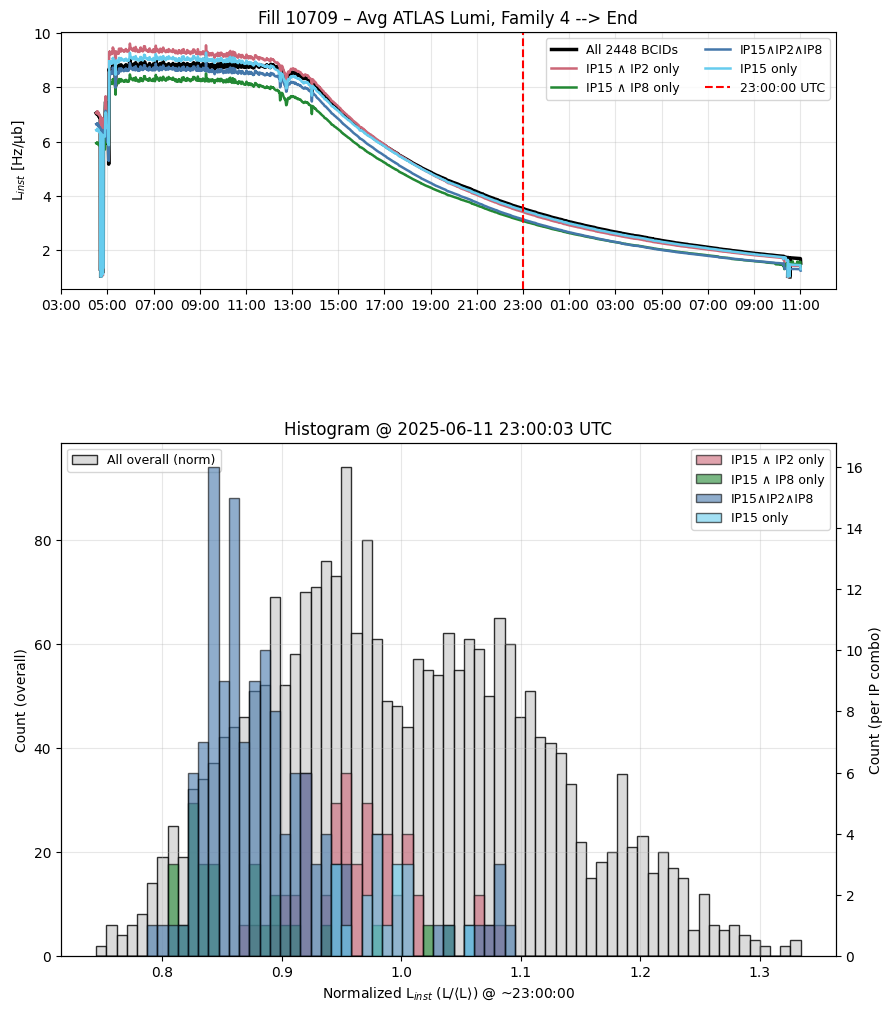

In [338]:
analysis_time_str = "23:00:00"
# ── 4) Snapshot at analysis_time_str & histograms ─────────────────────────
first_day = time_index[0].date()
target_dt = pd.Timestamp(f"{first_day} {analysis_time_str}", tz="UTC")
idx_near  = (time_index.to_series().sub(target_dt).abs()).idxmin()
ser_slice = atlas_df.loc[idx_near].astype(float)

# overall‐set slice & threshold
all_lumi = ser_slice[overall_ids]
all_lumi = all_lumi[all_lumi >= 1.0]

# per‐combo slice & threshold
ip_lumis = {
    name: ser_slice[slots][ser_slice[slots] >= 1.0]
    for name, slots in families_ip.items()
}

# normalize by mean of overall‐set
mean_all      = np.nanmean(all_lumi)
all_lumi_norm = all_lumi / mean_all
ip_lumis_norm = {n: arr/mean_all for n, arr in ip_lumis.items()}

# ── 5) Colour map ──────────────────────────────────────────────────────────
base_colors = ['#CC6677', '#228833', '#4477AA','#66CCEE']
color_map   = dict(zip(families_ip.keys(), base_colors))

# ── 6) Plot ─────────────────────────────────────────────────────────────────
fig = plt.figure(figsize=(10, 12))
gs  = gridspec.GridSpec(2, 1, height_ratios=[1, 2], hspace=0.4)

# — Top: time-series
ax1 = fig.add_subplot(gs[0])
ax1.plot(time_index, overall_curve, lw=2.5, color='black',
         label=f"All {len(overall_ids)} BCIDs")
for name, curve in ip_curves.items():
    ax1.plot(time_index, curve, lw=1.8,
             color=color_map[name], label=name)
ax1.axvline(target_dt, color='red', linestyle='--', lw=1.5,
            label=f"{analysis_time_str} UTC")
ax1.set_title(
    f"Fill {fno} – Avg ATLAS Lumi, Family 4 --> End"
)
ax1.set_ylabel("L$_{inst}$ [Hz/µb]")
ax1.legend(fontsize=9, ncol=2)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.grid(alpha=0.3)

# — Bottom: normalized histogram
ax2 = fig.add_subplot(gs[1])
bins = np.linspace(all_lumi_norm.min(), all_lumi_norm.max(), 70)
ax2.hist(all_lumi_norm, bins=bins,
         color='lightgray', alpha=0.8, edgecolor='black',
         label="All overall (norm)")
ax2.set_xlabel(f"Normalized L$_{{inst}}$ (L/⟨L⟩) @ ~{analysis_time_str}")
ax2.set_ylabel("Count (overall)")
ax2.legend(loc='upper left', fontsize=9)
ax2.grid(alpha=0.3)

ax3 = ax2.twinx()
for name, arr in ip_lumis_norm.items():
    ax3.hist(arr, bins=bins,
             color=color_map[name], alpha=0.6, edgecolor='black',
             label=name)
ax3.set_ylabel("Count (per IP combo)")
ax3.legend(loc='upper right', fontsize=9)

ax2.set_title(f"Histogram @ {idx_near.strftime('%Y-%m-%d %H:%M:%S %Z')}")
plt.tight_layout()

# ── 7) Save outputs ─────────────────────────────────────────────────────────
outdir = Path.home() / "work" / f"FILL{fno:05d}" / "ATLAS_fam4_b2"
outdir.mkdir(parents=True, exist_ok=True)
png = outdir / "family18.png"
gif = outdir / "family18.gif"
fig.savefig(png, dpi=200)
Image.open(png).save(gif, format="GIF")

print("Saved:", png)


In [339]:
import re
import numpy as np
from PIL import Image
import imageio
from pathlib import Path

def make_video_movie(fill_number: int,
                     pattern: str = "family*.gif",
                     output_name: str = "ATLAS_fam_movie4_b2.mp4",
                     fps: float = 2.0,
                     reverse: bool = False):
    """
    Converts a series of GIF frames into a single MP4 video.

    Args:
        fill_number: Fill number (used in folder naming).
        pattern:     Glob pattern for GIF files.
        output_name: Name of the final MP4 video.
        fps:         Frames per second for playback.
        reverse:     If True, reverse frame order.
    """
    gif_dir = Path.home() / "work" / f"FILL{fill_number:05d}" / "ATLAS_fam4_b2"
    output_path = gif_dir.parent / output_name

    def extract_number(fname):
        match = re.search(r'(\d+)', fname.stem)
        return int(match.group(1)) if match else -1

    gif_files = sorted(gif_dir.glob(pattern), key=extract_number)

    if not gif_files:
        raise FileNotFoundError(f"No GIF files found in {gif_dir} matching {pattern}")

    if reverse:
        gif_files = gif_files[::-1]

    writer = imageio.get_writer(
        str(output_path), fps=fps, codec='libx264', format='mp4', quality=8
    )

    for gif_file in gif_files:
        img = Image.open(gif_file).convert("RGB")
        writer.append_data(np.array(img))

    writer.close()
    print(f"✅ Video saved to: {output_path}")


In [340]:
make_video_movie(
    fill_number=10709,
    fps=1.0,
    reverse=False
)

[rawvideo @ 0x21733fc0] Stream #0: not enough frames to estimate rate; consider increasing probesize


✅ Video saved to: /home/kpervain/work/FILL10709/ATLAS_fam_movie4_b2.mp4


In [ ]:
import itertools

# — your existing collision‐ID sets per beam:
# coll_beam = {'B1': {'IP15': set(...), 'IP2': set(...), 'IP8': set(...)},
#              'B2': {...} }

# — your existing family‐to‐bunch‐ID sets per beam:
families_by_beam = {
    'B1': {
        'Family_1_b1': set(Family_1_b1),
        'Family_2_b1': set(Family_2_b1),
        'Family_3_b1': set(Family_3_b1),
        'Family_4_b1': set(Family_4_b1),
    },
    'B2': {
        'Family_1_b2': set(Family_1_b2),
        'Family_2_b2': set(Family_2_b2),
        'Family_3_b1': set(Family_3_b2),
        'Family_4_b2': set(Family_4_b2),
    }
}

def compute_collisions(beam, coll_beam, families_by_beam):
    """
    Returns four arrays of unique bunch-IDs (np.int64) for this beam:
      - coll_15      : collide only at IP15
      - coll_15_8    : collide at IP15 & IP8 only
      - coll_15_2    : collide at IP15 & IP2 only
      - coll_15_8_2  : collide at IP15 & IP8 & IP2
    """
    ip_sets  = coll_beam[beam]
    fam_sets = families_by_beam[beam]

    def only_at(combo, fam_set):
        s = fam_set.intersection(*(ip_sets[ip] for ip in combo))
        for other in set(ip_sets) - set(combo):
            s -= ip_sets[other]
        return s

    combos = {
        ('IP15',)            : 'coll_15',
        ('IP15','IP8')       : 'coll_15_8',
        ('IP15','IP2')       : 'coll_15_2',
        ('IP15','IP8','IP2') : 'coll_15_8_2',
    }

    results = {}
    for combo, name in combos.items():
        union_bids = set()
        for fam_set in fam_sets.values():
            union_bids |= only_at(combo, fam_set)
        # make a sorted numpy array of int64, no duplicates
        results[name] = np.array(sorted(union_bids), dtype=np.int64)

    return (
        results['coll_15'],
        results['coll_15_8'],
        results['coll_15_2'],
        results['coll_15_8_2']
    )

# usage example (for beam "B1"):
coll_15, coll_15_8, coll_15_2, coll_15_8_2 = compute_collisions(
    beam="B1",
    coll_beam=coll_beam,
    families_by_beam=families_by_beam
)

# Now `coll_15`, etc. are exactly your four np.int64 arrays:
print("IP15 only      :", coll_15)
print("IP15 & IP8     :", coll_15_8)
print("IP15 & IP2     :", coll_15_2)
print("IP15 & IP8 & IP2:", coll_15_8_2)
print(len(coll_15))
print(len(coll_15_8))
print(len(coll_15_2))
print(len(coll_15_8_2))










IP15 only      : [ 796  797  798  839  840  841  882  883  884 2725 2726 2727 2878 2879
 2880 3074 3075 3076 3270 3271 3272]
IP15 & IP8     : [  55   56   57   98   99  100  141  142  143  208  209  210  251  252
  253  294  295  296  337  338  339  404  405  406  447  448  449  490
  491  492  533  534  535  600  601  602  643  644  645  686  687  688
  729  730  731  949  950  951  992  993  994 1035 1036 1037 1102 1103
 1104 1145 1146 1147 1188 1189 1190 1231 1232 1233 1298 1299 1300 1341
 1342 1343 1384 1385 1386 1427 1428 1429 1494 1495 1496 1537 1538 1539
 1580 1581 1582 1623 1624 1625 1690 1691 1692 1733 1734 1735 1776 1777
 1778 1779 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791
 1792 1793 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805
 1806 1807 1808 1809 1810 1811 1870 1871 1872 1873 1874 1875 1876 1913
 1914 1915 1916 1917 1918 1919 1956 1957 1958 1959 1960 1961 1962 1963
 1964 2023 2024 2025 2026 2027 2028 2029 2066 2067 2068 2069 2070 2071
 2072 

### CMS LUMI

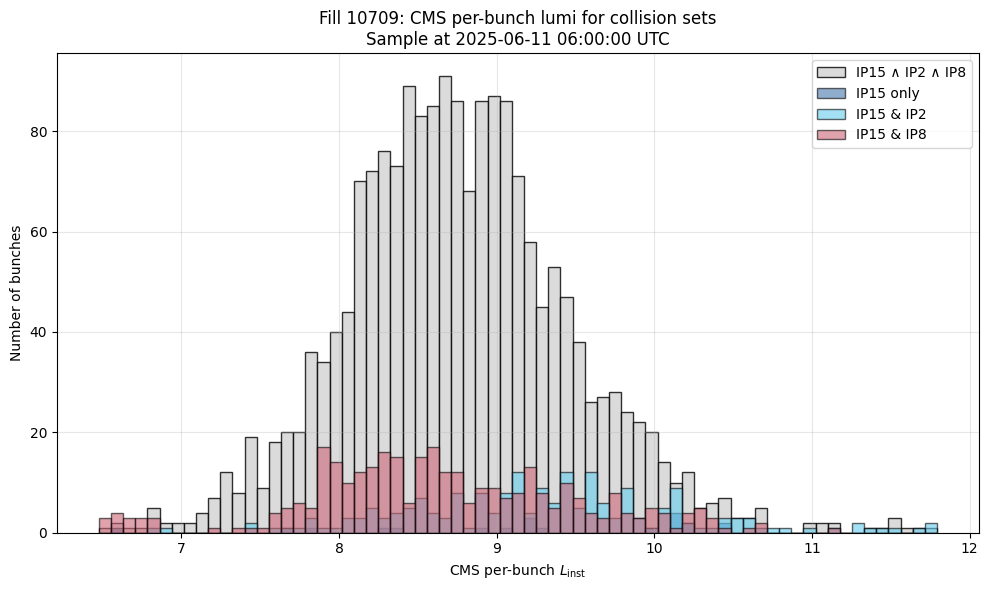

In [ ]:
import math
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ───────────────────────────────────────────────────────────────
# CONFIGURATION
# ───────────────────────────────────────────────────────────────
fno          = 10709
cms_lumi_var = "CMS:BUNCH_LUMI_INST"
DATADIR      = Path("/eos/project/l/lhc-lumimod/LuminosityFollowUp/2025/")
RAWPATH      = DATADIR / "rawdata"
FILLINFO     = DATADIR / "fills-info"

# ───────────────────────────────────────────────────────────────
# 1) Load the STABLE window timestamps
# ───────────────────────────────────────────────────────────────
fbmodes = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")
rowST = (
    fbmodes.loc[fno]
           .query("BMODE=='STABLE'")
           .sort_values("tsStart")
)
if rowST.empty:
    rowST = fbmodes.loc[fno].sort_values("tsEnd").iloc[[-1]]

t0 = pd.to_datetime(rowST["tsStart"].iloc[0], utc=True)
t1 = pd.to_datetime(rowST["tsEnd"  ].iloc[0], utc=True)

# ───────────────────────────────────────────────────────────────
# 2) Read & slice CMS per-bunch lumi in that window
# ───────────────────────────────────────────────────────────────
ser = pd.read_parquet(
    RAWPATH / f"HX:FILLN={fno}",
    columns=[cms_lumi_var]
)[cms_lumi_var]
ser.index = pd.to_datetime(ser.index, utc=True, errors="coerce")
ser = ser[(ser.index >= t0) & (ser.index <= t1)].dropna()

if ser.empty:
    raise RuntimeError("No CMS per-bunch lumi in the STABLE window.")

# ───────────────────────────────────────────────────────────────
# 3) Select the sample closest to 23:00 UTC on the first day
# ───────────────────────────────────────────────────────────────
first_day = ser.index[0].date()
target_dt = pd.Timestamp(f"{first_day} 06:00:00", tz="UTC")
idx_near  = (ser.index.to_series().sub(target_dt).abs()).idxmin()
cms_vals  = ser.loc[idx_near]  # numpy array of length ~3564

# ───────────────────────────────────────────────────────────────
# 4) Define your collision‐set arrays (must be numpy int arrays)
#    These should have been computed earlier in your workflow:
#      coll_15, coll_15_2, coll_15_8, coll_15_8_2
# ───────────────────────────────────────────────────────────────
# Example placeholders (replace with your real arrays):
# coll_15       = np.array([...], dtype=int)
# coll_15_2     = np.array([...], dtype=int)
# coll_15_8     = np.array([...], dtype=int)
# coll_15_8_2   = np.array([...], dtype=int)

# ───────────────────────────────────────────────────────────────
# 5) Helper to extract ≥1 lumi for a given bunch‐ID array
# ───────────────────────────────────────────────────────────────
def cms_for(idx_array):
    vals = cms_vals[idx_array]
    return vals[vals >= 1]

# extract the four subsets
bg   = cms_for(coll_15_8_2)   # background: IP15 ∧ IP2 ∧ IP8
c15  = cms_for(coll_15)       # IP15 only
c152 = cms_for(coll_15_2)     # IP15 ∧ IP2
c158 = cms_for(coll_15_8)     # IP15 ∧ IP8

# ───────────────────────────────────────────────────────────────
# 6) Plot histogram overlays
# ───────────────────────────────────────────────────────────────
# common bin edges spanning the background
bins = np.linspace(bg.min(), bg.max(), 70)

plt.figure(figsize=(10, 6))

# background histogram
plt.hist(
    bg, bins=bins,
    color='lightgray', alpha=0.8,
    label='IP15 ∧ IP2 ∧ IP8',
    edgecolor='black'
)

# overlays
plt.hist(c15,  bins=bins, color='#4477AA', alpha=0.6, label='IP15 only',  edgecolor='black')
plt.hist(c152, bins=bins, color='#66CCEE', alpha=0.6, label='IP15 & IP2', edgecolor='black')
plt.hist(c158, bins=bins, color='#CC6677', alpha=0.6, label='IP15 & IP8', edgecolor='black')

plt.xlabel("CMS per-bunch $L_{\\rm inst}$")
plt.ylabel("Number of bunches")
plt.title(
    f"Fill {fno}: CMS per-bunch lumi for collision sets\n"
    f"Sample at {idx_near.strftime('%Y-%m-%d %H:%M:%S %Z')}"
)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from pathlib import Path
from PIL import Image
import sys

# ── Ensure pyarrow is available for reading parquet ──────────────────────────
try:
    import pyarrow
except ImportError:
    print("Missing dependency: pyarrow\nPlease install it using:")
    print("  pip install pyarrow")
    sys.exit(1)

# ── Configuration ────────────────────────────────────────────────────────────
fno = 10709
#fno = 10732
atlas_lumi_var = "LHC.BCTFR.B6R4.B1:BUNCH_INTENSITY"
DATADIR = Path("/eos/project/l/lhc-lumimod/LuminosityFollowUp/2025/")
RAWPATH = DATADIR / "rawdata"
FILLINFO = DATADIR / "fills-info"

families = {
    #'IP15'       : family_4_ip15_b1,
    'IP15∧IP2'   : family_4_ip15_2_b1,
    'IP15∧IP8'   : family_4_ip15_8_b1,
    'IP15∧IP2∧IP8': family_4_ip15_2_8_b1,
}

# ── Single analysis time setup ───────────────────────────────────────────────

# ── 1) Load STABLE window ────────────────────────────────────────────────────
fbmodes = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")
if 'timestamp' in fbmodes.columns:
    fbmodes = fbmodes.set_index('timestamp').sort_index()

rowST = (fbmodes.loc[fno]
         .query("BMODE=='STABLE'")
         .sort_values("tsStart"))
if rowST.empty:
    rowST = fbmodes.loc[fno].sort_values("tsEnd").iloc[[-1]]

t0 = pd.to_datetime(rowST["tsStart"].iloc[0], utc=True)
t1 = pd.to_datetime(rowST["tsEnd"].iloc[0], utc=True)

# ── 2) Read & slice per-bunch lumi ───────────────────────────────────────────
raw = pd.read_parquet(RAWPATH / f"HX:FILLN={fno}", columns=[atlas_lumi_var])
ser = raw[atlas_lumi_var]
ser.index = pd.to_datetime(ser.index, utc=True, errors="coerce")
ser = ser[(ser.index >= t0) & (ser.index <= t1)].dropna()

if ser.dtype == object and isinstance(ser.iloc[0], (list, np.ndarray)):
    atlas_df = pd.DataFrame(ser.tolist(), index=ser.index)
else:
    atlas_df = ser.to_frame()

time_index = atlas_df.index
M_atlas = atlas_df.values

# ── 3) Compute averages ──────────────────────────────────────────────────────
overall_curve = np.nanmean(M_atlas, axis=1)
family_curves = {
    fam_name: np.nanmean(M_atlas[:, slots], axis=1)
    for fam_name, slots in families.items()
}


Text(0.5, 1.0, 'Histogram @ 2025-06-11 06:00:00 UTC')

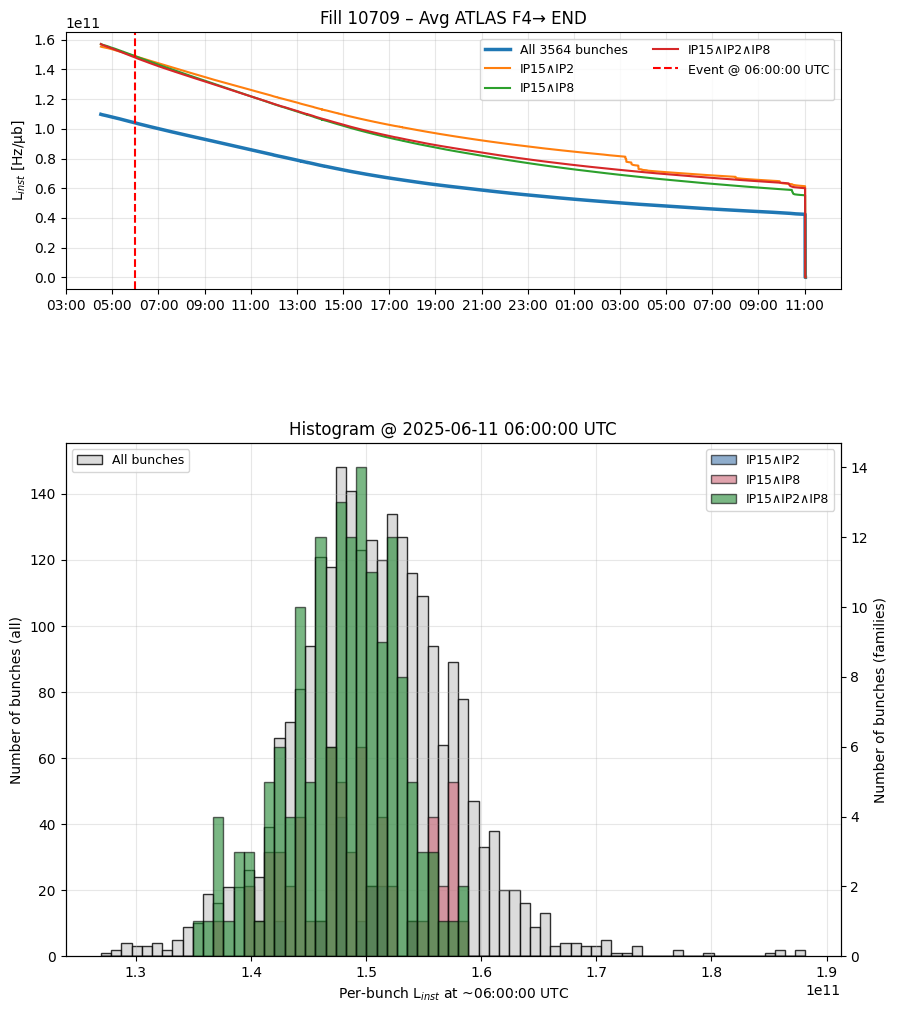

In [ ]:
analysis_time_str = "06:00:00"
# ── 4) Histogram data at analysis time ───────────────────────────────────────
first_day = ser.index[0].date()
target_dt = pd.Timestamp(f"{first_day} {analysis_time_str}", tz="UTC")
event_time = target_dt

idx_near = (ser.index.to_series().sub(target_dt).abs()).idxmin()
ser6_arr = ser.loc[idx_near]

bunch_ids = np.arange(len(ser6_arr))
all_lumi = ser6_arr[bunch_ids]
all_lumi = all_lumi[all_lumi >= 1]

fam_lumis = {}
for name, ids in families.items():
    arr = ser6_arr[np.intersect1d(ids, bunch_ids)]
    fam_lumis[name] = arr[arr >= 1]

fig = plt.figure(figsize=(10, 12))
gs  = gridspec.GridSpec(2, 1, height_ratios=[1, 2], hspace=0.4)

# Top panel: time-series (unchanged)
ax1 = fig.add_subplot(gs[0])
ax1.plot(time_index, overall_curve, lw=2.5, label=f"All {M_atlas.shape[1]} bunches")
for fam_name, fam_curve in family_curves.items():
    ax1.plot(time_index, fam_curve, lw=1.5, label=fam_name)
ax1.axvline(target_dt, color='red', linestyle='--', lw=1.5,
            label=f"Event @ {analysis_time_str} UTC")
ax1.set_title(f"Fill {fno} – Avg ATLAS F4→ END")
ax1.set_ylabel("L$_{inst}$ [Hz/µb]")
ax1.legend(fontsize=9, ncol=2)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.grid(alpha=0.3)

# Bottom panel: histogram
ax2 = fig.add_subplot(gs[1])
bins = np.linspace(all_lumi.min(), all_lumi.max(), 70)

# background histogram on left axis
ax2.hist(all_lumi, bins=bins,
         color='lightgray', alpha=0.8,
         label='All bunches',
         edgecolor='black')
ax2.set_xlabel(f"Per-bunch L$_{{inst}}$ at ~{analysis_time_str} UTC")
ax2.set_ylabel("Number of bunches (all)")
ax2.legend(loc='upper left', fontsize=9)
ax2.grid(alpha=0.3)

# overlay family histograms on twin axis
ax3 = ax2.twinx()
colors = ['#4477AA', '#CC6677', '#228833']#,'#66CCEE']
for (name, lumi), c in zip(fam_lumis.items(), colors):
    ax3.hist(lumi, bins=bins,
             color=c, alpha=0.6,
             label=name,
             edgecolor='black')
ax3.set_ylabel("Number of bunches (families)")   # ← RHS axis label
ax3.legend(loc='upper right', fontsize=9)       # ← family legend

ax2.set_title(f"Histogram @ {idx_near.strftime('%Y-%m-%d')} {analysis_time_str} UTC")


